# Downloading and Storing Dataset from Kaggle

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("D:/GEN_AI/Projects_and_Github/Image_Classification_Keras_CNNk/kaggle/datasets/dogs-vs-cats")

# print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [06:56<00:00, 2.74MB/s]

Extracting files...


Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\salader\dogs-vs-cats\versions\1


# Importing Libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from keras.utils import plot_model
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from PIL import Image
import random
import os

In [23]:
import os

path = r"D:\GEN_AI\Projects_and_Github\Image_Classification_Keras_CNN\kaggle\datasets\dogs_vs_cats\train\cats"

if os.path.exists(path):
    print("Path exists!")
    
else:
    print("Path does not exist!")
    
    
os.listdir(path)
random.sample(os.listdir(path),5)

Path exists!


['cat.3684.jpg',
 'cat.7026.jpg',
 'cat.6772.jpg',
 'cat.5447.jpg',
 'cat.5221.jpg']

In [18]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

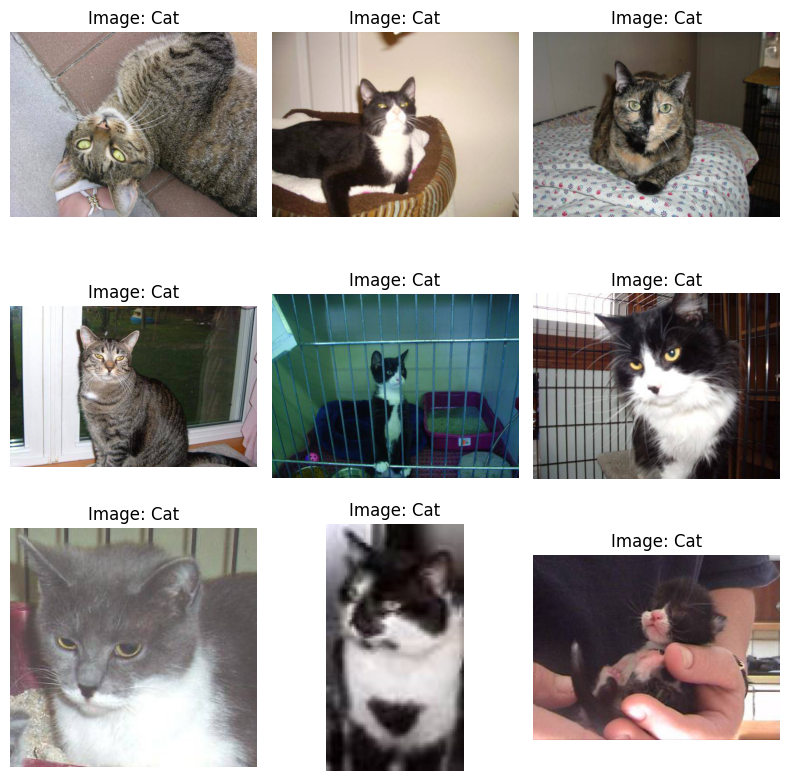

In [19]:
# Placeholder for the directory path
cat_directory_path = r"D:\GEN_AI\Projects_and_Github\Image_Classification_Keras_CNN\kaggle\datasets\dogs_vs_cats\train\cats"  # Replace with your directory path
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

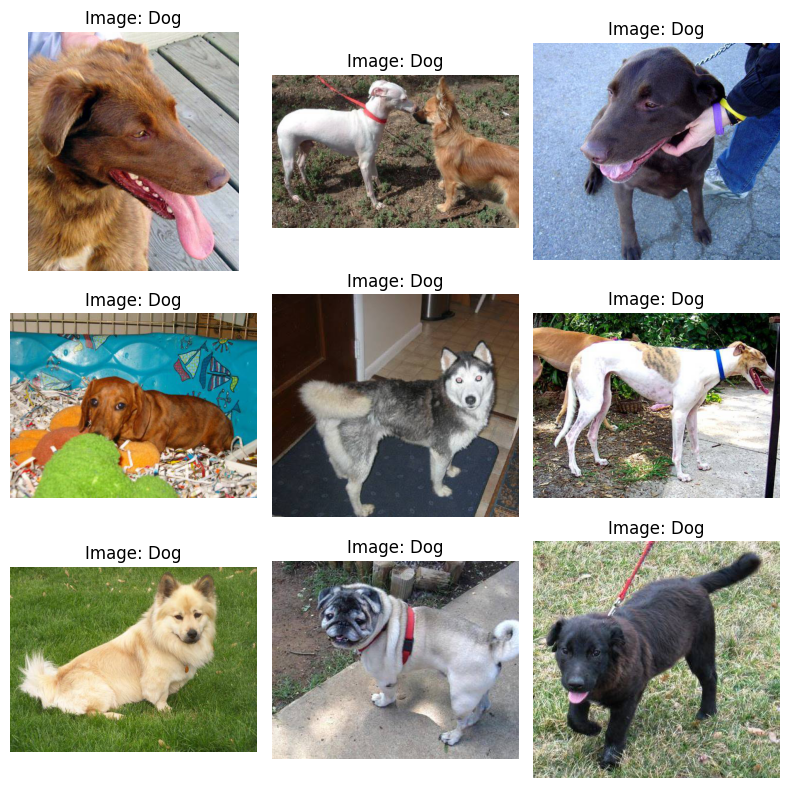

In [24]:
# Placeholder for the directory path
dog_directory_path = r"D:\GEN_AI\Projects_and_Github\Image_Classification_Keras_CNN\kaggle\datasets\dogs_vs_cats\train\dogs"  # Replace with your directory path
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

In [25]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animal = ["Cats", "Dogs"]
count = [len(cat_images) , len(dog_images)]

print("Total Images in Cats Dir :" ,len(cat_images) , "Total Images in Dogs Dir :", len(dog_images))

Total Images in Cats Dir : 10000 Total Images in Dogs Dir : 10000


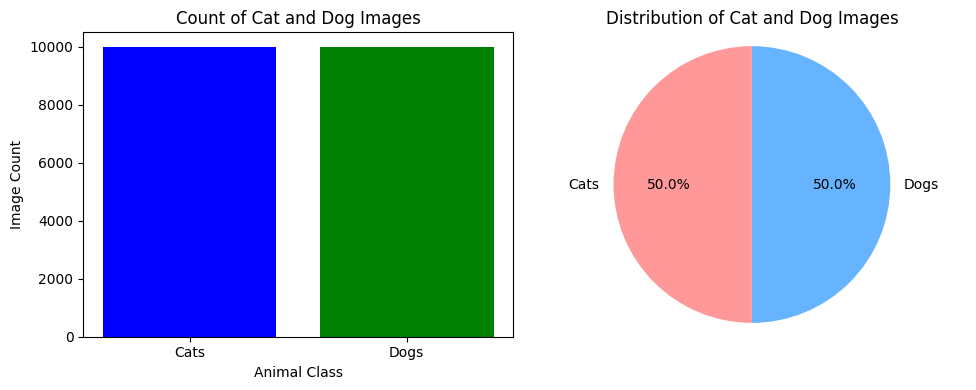

In [30]:
fig , ax = plt.subplots(1,2, figsize = (10,4))
ax[0].bar(classes_animal , count , color =['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')


# Pie chart on the second subplot
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels=classes_animal, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()

In [33]:
import os
import cv2
import imghdr

# Define the list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = r"D:\GEN_AI\Projects_and_Github\Image_Classification_Keras_CNN\kaggle\datasets\dogs_vs_cats"

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12720\2593601925.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [37]:
# Import necessary libraries
import numpy as np
from PIL import Image

image = r'D:\GEN_AI\Projects_and_Github\Image_Classification_Keras_CNN\kaggle\datasets\dogs_vs_cats\train\dogs\dog.1000.jpg'
# Load the image with PIL and convert to a NumPy array
img_pil = Image.open(image)
img_array = np.array(img_pil)

# Print the NumPy array of the image
print(img_array)

# Print the NumPy array of the image
print(img_array.shape)

[[[  8   9   4]
  [ 10  11   6]
  [ 12  14  11]
  ...
  [160 162 185]
  [159 161 184]
  [158 160 183]]

 [[ 15  14  10]
  [ 16  15  11]
  [ 17  17  15]
  ...
  [157 159 182]
  [156 158 181]
  [155 157 180]]

 [[ 16  13   8]
  [ 17  13  10]
  [ 17  16  12]
  ...
  [155 157 180]
  [154 156 179]
  [153 155 178]]

 ...

 [[110  95  88]
  [111  96  89]
  [112  97  90]
  ...
  [128 112  99]
  [128 112  99]
  [128 112  99]]

 [[110  95  88]
  [109  94  87]
  [110  95  88]
  ...
  [129 113 100]
  [129 113 100]
  [129 113 100]]

 [[113  98  91]
  [110  95  88]
  [109  94  87]
  ...
  [125 109  96]
  [125 109  96]
  [125 109  96]]]
(375, 499, 3)


In [ ]:
# Set path to the dataset
base_dir = r'D:\GEN_AI\Projects_and_Github\Image_Classification_Keras_CNN\kaggle\datasets\dogs_vs_cats\train'

# All images will be rescaled by 1./255 (0 to 1)  
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [39]:
 # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [40]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


In [41]:
images, labels = next(train_generator)
images, labels

(array([[[[0.09803922, 0.09803922, 0.09803922],
          [0.11764707, 0.11764707, 0.11764707],
          [0.15686275, 0.15686275, 0.15686275],
          ...,
          [0.12156864, 0.1254902 , 0.13333334],
          [0.18823531, 0.19215688, 0.20000002],
          [0.18039216, 0.18431373, 0.19215688]],
 
         [[0.10588236, 0.10588236, 0.10588236],
          [0.12156864, 0.12156864, 0.12156864],
          [0.16078432, 0.16078432, 0.16078432],
          ...,
          [0.17254902, 0.1764706 , 0.18431373],
          [0.19215688, 0.19607845, 0.20392159],
          [0.21960786, 0.22352943, 0.23137257]],
 
         [[0.12941177, 0.12941177, 0.12941177],
          [0.16470589, 0.16470589, 0.16470589],
          [0.20392159, 0.20392159, 0.20392159],
          ...,
          [0.19215688, 0.19607845, 0.20392159],
          [0.21960786, 0.22352943, 0.23137257],
          [0.23529413, 0.2392157 , 0.24705884]],
 
         ...,
 
         [[0.4156863 , 0.09411766, 0.18431373],
          [0.42352

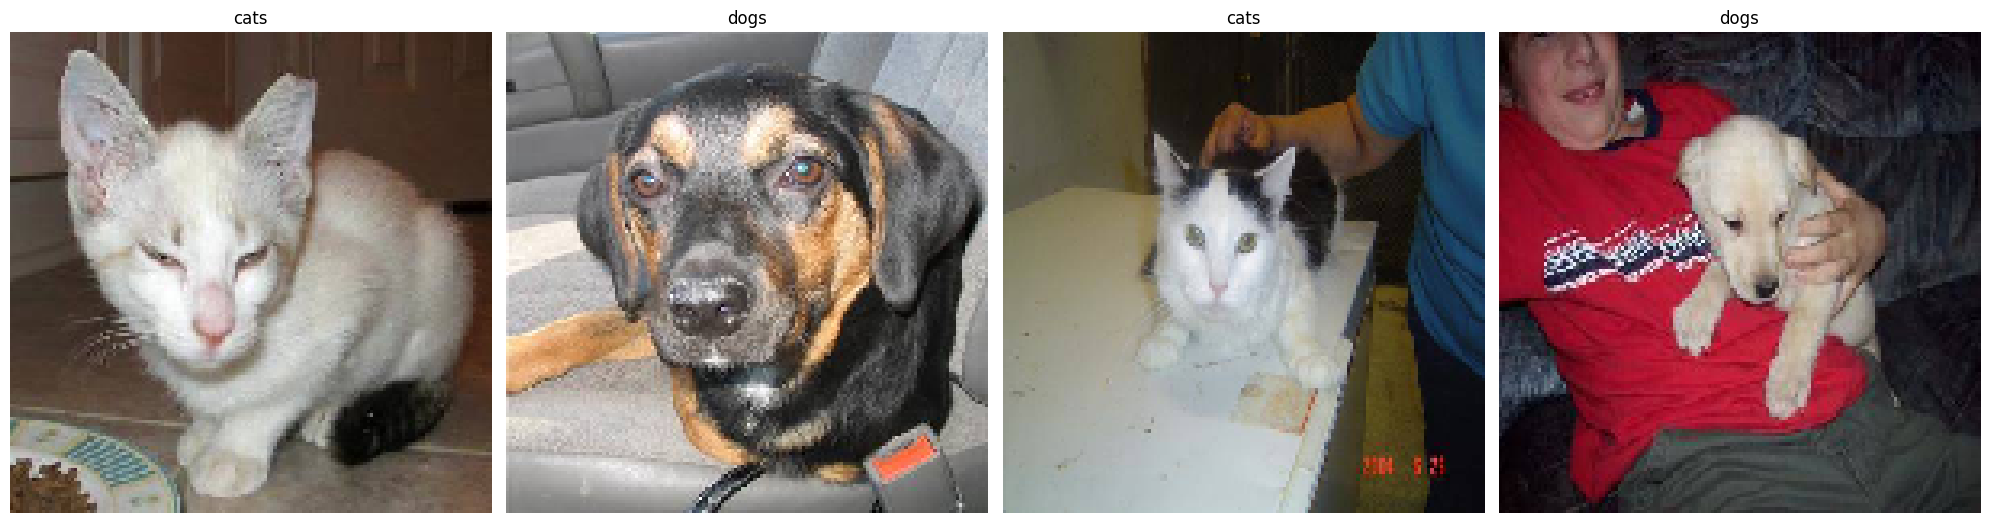

In [51]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [52]:
train_generator.reset()

In [53]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

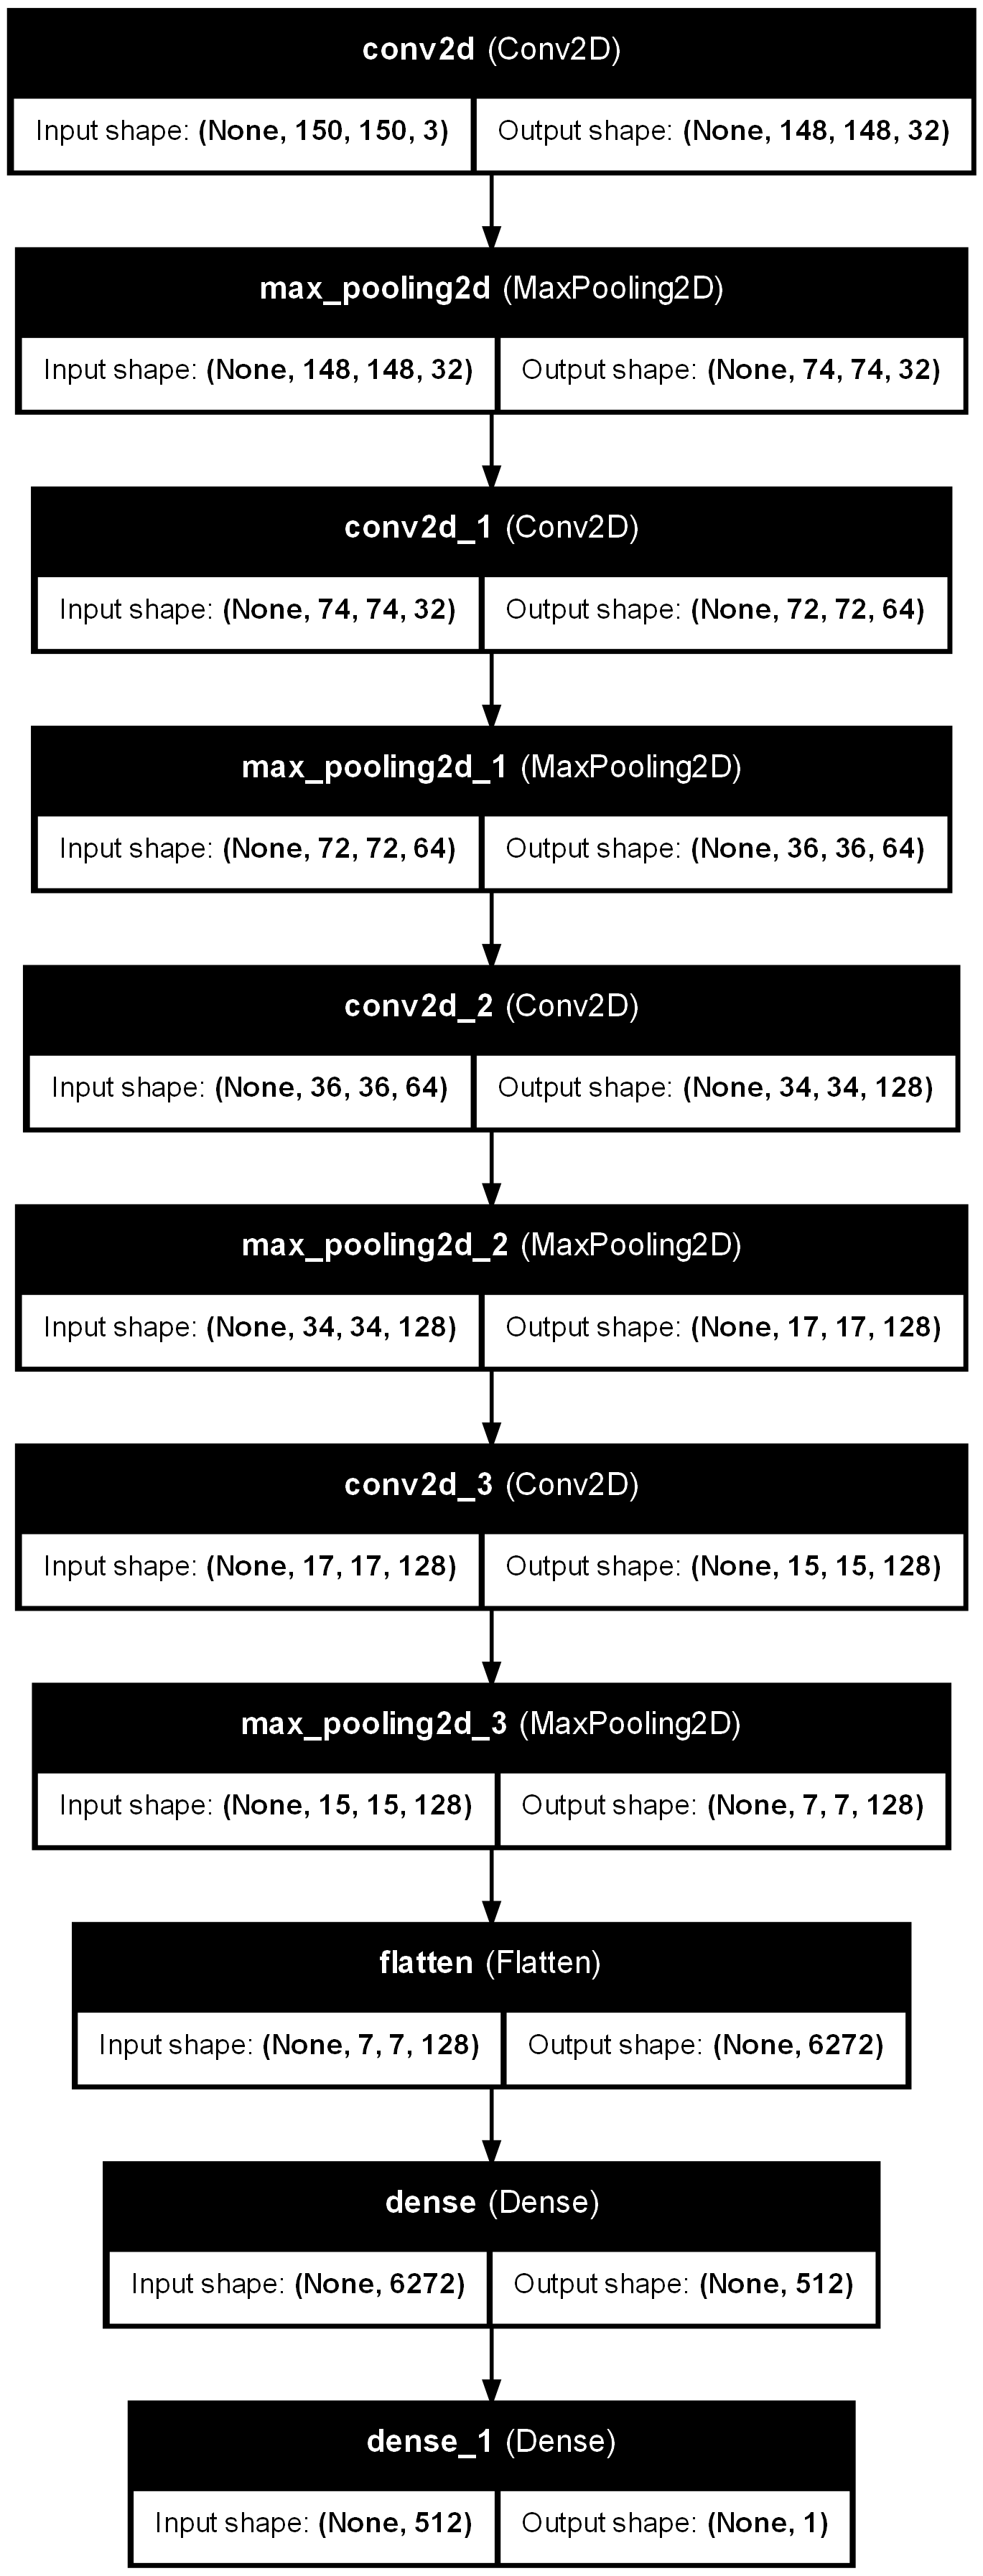

In [54]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

# Parameter Calculation in CNN Layers

## Conv2D Layer
The formula to calculate the number of parameters in a Conv2D layer is:

Parameters = (kernel_height × kernel_width × input_channels + 1) × number_of_filters


The `+1` accounts for the bias term for each filter.

### 1. First Conv2D Layer
- **Input shape**: `(150, 150, 3)`
- **Number of filters**: `32`
- **Filter size**: `(3, 3)`
- **Parameters**: (3 × 3 × 3 + 1) × 32 = 896


### 2. Second Conv2D Layer
- **Input channels**: `32` (from the previous Conv2D layer)
- **Number of filters**: `64`
- **Filter size**: `(3, 3)`
- **Parameters**:(3 × 3 × 32 + 1) × 64 = 18,496


### 3. Third Conv2D Layer
- **Input channels**: `64`
- **Number of filters**: `128`
- **Filter size**: `(3, 3)`
- **Parameters**:(3 × 3 × 64 + 1) × 128 = 73,856


### 4. Fourth Conv2D Layer
- **Input channels**: `128`
- **Number of filters**: `128`
- **Filter size**: `(3, 3)`
- **Parameters**:(3 × 3 × 128 + 1) × 128 = 147,584



### MaxPooling2D Layer
MaxPooling layers do not have parameters; they only reduce the size of the input they're applied to, based on their pool size and stride.

### Flatten Layer
The Flatten layer itself doesn't have parameters. It simply reshapes the input but does not affect the total parameter count.

### Dense Layer
The formula for a Dense (fully connected) layer is: 
**Parameters=(input\_size+1)×output\_size**


**1. First Dense Layer**
- Assuming Flatten output size: X (you'll need to calculate this based on the output of the last pooling layer).
- Output size: 512
- Parameters: (X+1)×512


**2. Second Dense Layer**
- Input size: 512
- Output size: 1 (for binary classification)
- Parameters:(512+1)×1=513

In [55]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [59]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - accuracy: 0.6397 - loss: 0.6325

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 606s 757ms/step - accuracy: 0.6398 - loss: 0.6325 - val_accuracy: 0.7320 - val_loss: 0.5490
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 606s 757ms/step - accuracy: 0.7447 - loss: 0.5173 - val_accuracy: 0.7807 - val_loss: 0.4643
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 473s 591ms/step - accuracy: 0.8056 - loss: 0.4160 - val_accuracy: 0.8338 - val_loss: 0.3767
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 546s 682ms/step - accuracy: 0.8567 - loss: 0.3329 - val_accuracy: 0.8360 - val_loss: 0.3728
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 576s 720ms/step - accuracy: 0.8924 - loss: 0.2624 - val_accuracy: 0.8560 - val_loss: 0.3313


In [60]:
history.history

{'accuracy': [0.668624997138977,
  0.7640625238418579,
  0.8149999976158142,
  0.8608750104904175,
  0.890999972820282],
 'loss': [0.604362428188324,
  0.49046483635902405,
  0.4057524800300598,
  0.3230251967906952,
  0.26253005862236023],
 'val_accuracy': [0.7319999933242798,
  0.7807499766349792,
  0.8337500095367432,
  0.8360000252723694,
  0.8560000061988831],
 'val_loss': [0.5490357279777527,
  0.4643430709838867,
  0.3767029643058777,
  0.37283360958099365,
  0.3312915861606598]}

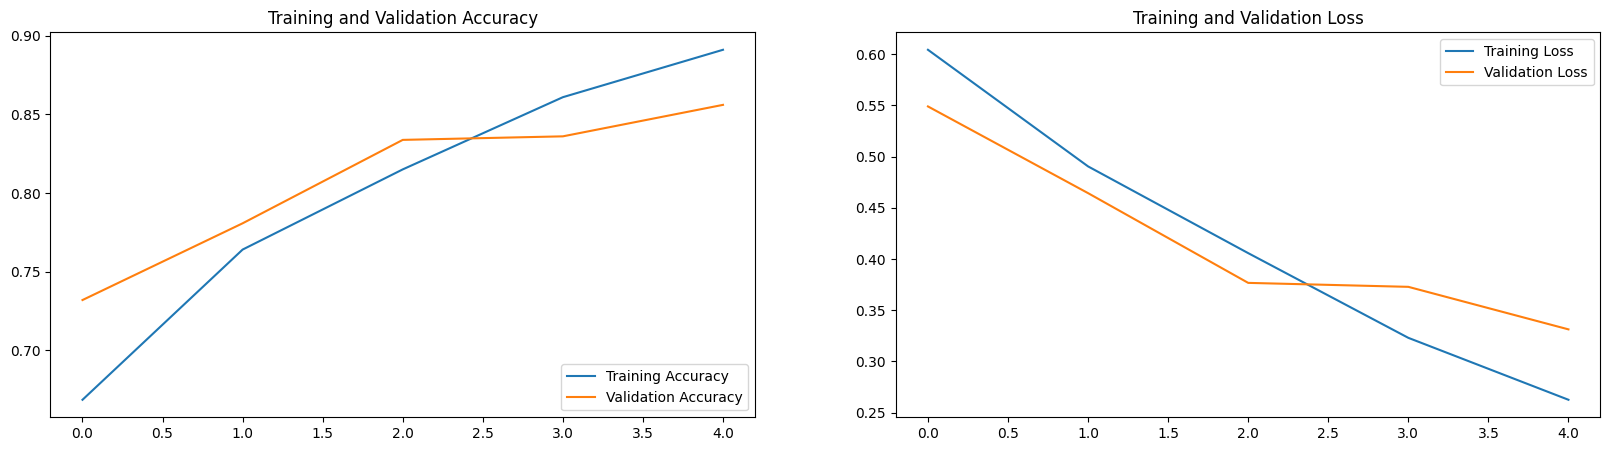

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = r'D:\GEN_AI\Projects_and_Github\Image_Classification_Keras_CNN\kaggle\datasets\dogs_vs_cats\test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


In [68]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

In [70]:
# probabilities = model.predict(test_generator,
#                               steps=np.ceil(test_generator.samples/test_generator.batch_size))

probabilities = model.predict(
    test_generator,
    steps=int(np.ceil(test_generator.samples / test_generator.batch_size))
)
probabilities

250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 210ms/step


array([[7.1037481e-05],
       [2.2994722e-03],
       [5.5656661e-03],
       ...,
       [9.9872822e-01],
       [2.1540827e-01],
       [4.9088618e-01]], dtype=float32)

In [72]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=int(np.ceil(test_generator.samples/test_generator.batch_size)))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 178ms/step


array([0, 0, 0, ..., 1, 0, 0])

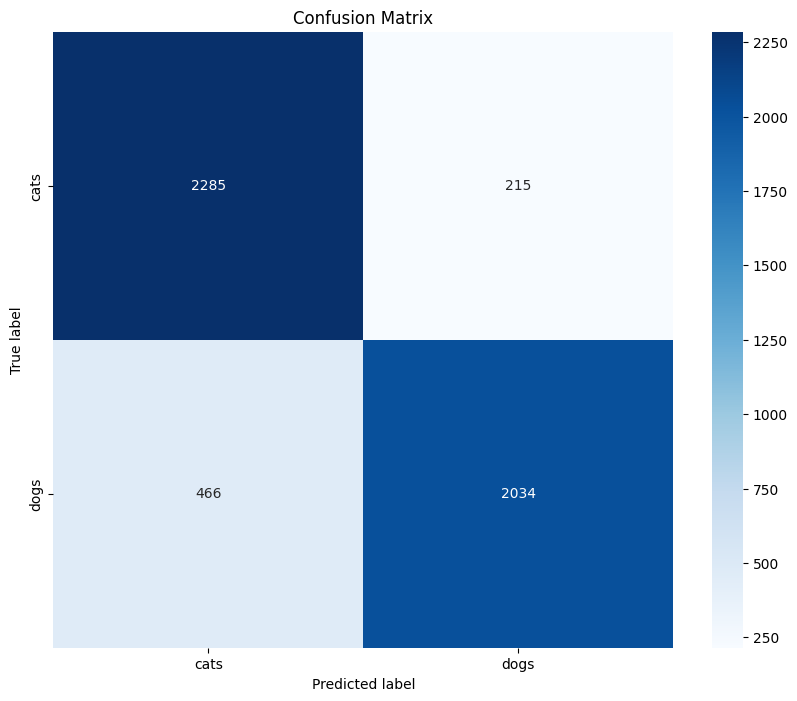

In [73]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [74]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - accuracy: 0.9022 - loss: 0.2468
Test accuracy: 86.38%
Test loss: 0.33
